In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Load actual electrolyte data from CSV files
electrolyte_files = {
    'PC': 'Electrolytes/PC.csv',
    'DEC': 'Electrolytes/DEC.csv', 
    'EC/DEC': 'Electrolytes/EC-DEC.csv',
    '10% FEC': 'Electrolytes/FEC.csv',
    'DME (FSI)': 'Electrolytes/DME (FSI).csv'
}

# Load all electrolyte data
electrolyte_data = {}
df_all_csv = pd.DataFrame()

for name, filepath in electrolyte_files.items():
    try:
        # Read CSV file
        df_temp = pd.read_csv(filepath)
        
        # Clean column names (remove spaces)
        df_temp.columns = df_temp.columns.str.strip()
        
        # Rename columns for consistency
        df_temp = df_temp.rename(columns={'x': 'E_V', 'y': 'j_mA_cm2'})
        
        # Add electrolyte label
        df_temp['Electrolyte'] = name
        
        # Store in dictionary for easy access
        electrolyte_data[name] = df_temp
        
        # Append to combined DataFrame
        df_all_csv = pd.concat([df_all_csv, df_temp], ignore_index=True)
        
        print(f"Loaded {name}: {len(df_temp)} data points")
        
    except Exception as e:
        print(f"Error loading {name}: {e}")

print(f"\nTotal data points loaded: {len(df_all_csv)}")
print(f"Electrolytes loaded: {list(electrolyte_data.keys())}")

# Display sample data for each electrolyte
print("\n" + "=" * 60)
print("Sample data from CSV files:")
print("=" * 60)

for name in electrolyte_data.keys():
    print(f"\n{name}:")
    sample_data = electrolyte_data[name].head()
    print(sample_data.to_string(index=False))

Loaded PC: 12 data points
Loaded DEC: 12 data points
Loaded EC/DEC: 26 data points
Loaded 10% FEC: 16 data points
Loaded DME (FSI): 17 data points

Total data points loaded: 83
Electrolytes loaded: ['PC', 'DEC', 'EC/DEC', '10% FEC', 'DME (FSI)']

Sample data from CSV files:

PC:
      E_V  j_mA_cm2 Electrolyte
-0.242088 36.021445          PC
-0.202004 27.188744          PC
-0.161921 19.278264          PC
-0.122505 13.387420          PC
-0.082422  8.118993          PC

DEC:
      E_V  j_mA_cm2 Electrolyte
-0.240752 45.301056         DEC
-0.199332 33.140703         DEC
-0.159916 23.993337         DEC
-0.120501 16.661711         DEC
-0.080418 10.317506         DEC

EC/DEC:
      E_V   j_mA_cm2 Electrolyte
-0.250772 171.907232      EC/DEC
-0.230731 151.703455      EC/DEC
-0.210021 129.754423      EC/DEC
-0.189311 113.317941      EC/DEC
-0.169269  94.923898      EC/DEC

10% FEC:
      E_V   j_mA_cm2 Electrolyte
-0.238747 232.549781     10% FEC
-0.209353 194.801737     10% FEC
-0.180626 156.

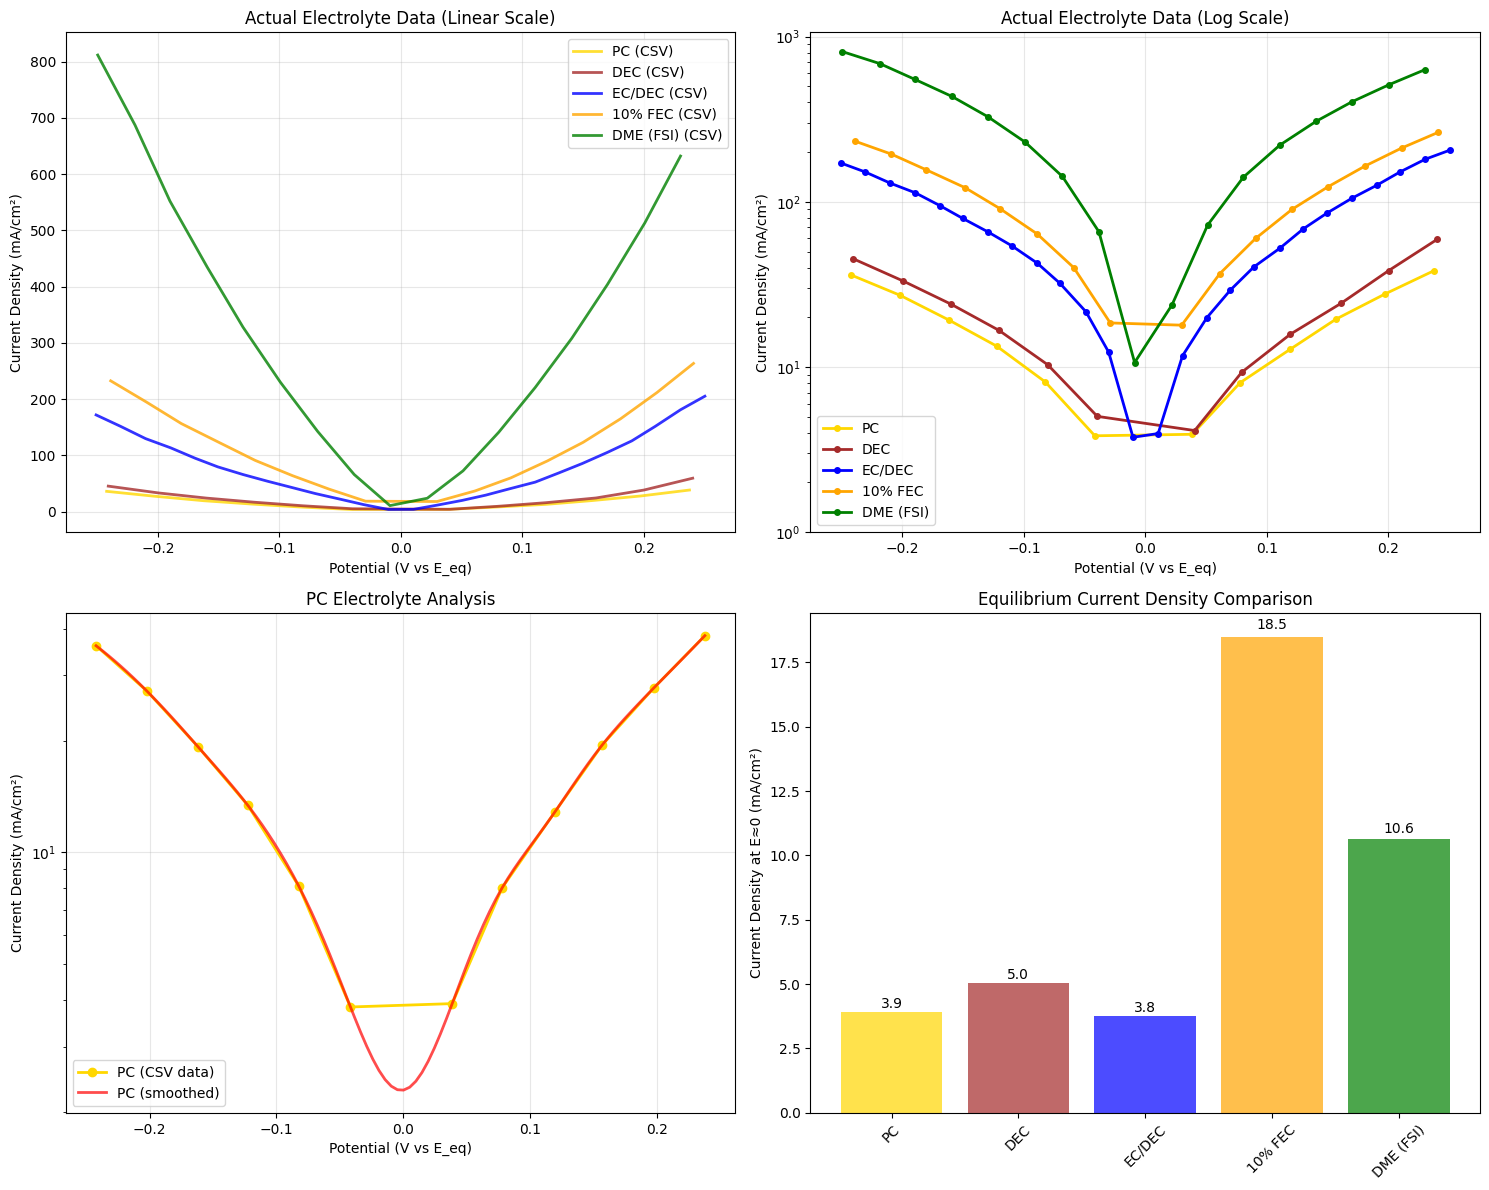

Equilibrium current densities (E ≈ 0 V):
PC: 3.92 mA/cm²
DEC: 5.03 mA/cm²
EC/DEC: 3.76 mA/cm²
10% FEC: 18.49 mA/cm²
DME (FSI): 10.65 mA/cm²


In [30]:
# Create comprehensive comparison plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Define colors for consistency
colors = {
    'PC': 'gold',
    'DEC': 'brown', 
    'EC/DEC': 'blue',
    '10% FEC': 'orange',
    'DME (FSI)': 'green'
}

# Plot 1: Linear scale comparison - Manual vs CSV data
for name in electrolyte_data.keys():
    csv_data = electrolyte_data[name]
    ax1.plot(csv_data['E_V'], csv_data['j_mA_cm2'], 
             label=f'{name} (CSV)', color=colors[name], linewidth=2, alpha=0.8)

ax1.set_xlabel('Potential (V vs E_eq)')
ax1.set_ylabel('Current Density (mA/cm²)')
ax1.set_title('Actual Electrolyte Data (Linear Scale)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Semi-log scale - CSV data
for name in electrolyte_data.keys():
    csv_data = electrolyte_data[name]
    ax2.semilogy(csv_data['E_V'], csv_data['j_mA_cm2'], 
                 label=f'{name}', color=colors[name], linewidth=2, marker='o', markersize=4)

ax2.set_xlabel('Potential (V vs E_eq)')
ax2.set_ylabel('Current Density (mA/cm²)')
ax2.set_title('Actual Electrolyte Data (Log Scale)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(1, None)  # Set lower limit for better visibility

# Plot 3: Detailed view of PC electrolyte data
if 'PC' in electrolyte_data:
    csv_data = electrolyte_data['PC']
    ax3.semilogy(csv_data['E_V'], csv_data['j_mA_cm2'], 
                 label='PC (CSV data)', color='gold', linewidth=2, marker='o')
    
    # Add trend line for visualization
    import numpy as np
    from scipy.interpolate import interp1d
    E_smooth = np.linspace(csv_data['E_V'].min(), csv_data['E_V'].max(), 100)
    f_interp = interp1d(csv_data['E_V'], csv_data['j_mA_cm2'], kind='cubic')
    j_smooth = f_interp(E_smooth)
    ax3.semilogy(E_smooth, j_smooth, 
                 label='PC (smoothed)', color='red', linewidth=2, alpha=0.7)
    
ax3.set_xlabel('Potential (V vs E_eq)')
ax3.set_ylabel('Current Density (mA/cm²)')
ax3.set_title('PC Electrolyte Analysis')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Current density at equilibrium potential (E=0)
equilibrium_currents = {}
for name in electrolyte_data.keys():
    csv_data = electrolyte_data[name]
    # Find current density closest to E = 0
    idx_eq = np.argmin(np.abs(csv_data['E_V'].values))
    equilibrium_currents[name] = csv_data['j_mA_cm2'].iloc[idx_eq]

names = list(equilibrium_currents.keys())
currents = list(equilibrium_currents.values())
bars = ax4.bar(names, currents, color=[colors[name] for name in names], alpha=0.7)
ax4.set_ylabel('Current Density at E≈0 (mA/cm²)')
ax4.set_title('Equilibrium Current Density Comparison')
ax4.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, current in zip(bars, currents):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{current:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Equilibrium current densities (E ≈ 0 V):")
for name, current in equilibrium_currents.items():
    print(f"{name}: {current:.2f} mA/cm²")

In [37]:
# Import model fitting capabilities using your optimization framework
import numpy as np
import importlib
import optimization
importlib.reload(optimization)

from models import Model
from optimization import TafelData, ParticleSwarmOptimizer, MCMCOptimizer, residual_function, objective_function
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Convert electrolyte data to TafelData format for optimization
def prepare_data_for_fitting(csv_data):
    """Convert electrolyte data to TafelData format for optimization"""
    # Get potential and current density data
    E_data = csv_data['E_V'].values
    j_data = csv_data['j_mA_cm2'].values
    
    # Convert current density to rate constant (reverse of i = n*F*k)
    # i = n*F*k => k = i / (n*F)
    F = 96485.3329
    n = 1
    # Convert from mA/cm² to A/m² (multiply by 10)
    k_data = np.abs(j_data) * 10 / (n * F)
    
    # Calculate ln(k)
    k_data = np.clip(k_data, 1e-20, None)  # Avoid log(0)
    lnk_data = np.log(k_data)
    
    # Return as TafelData object for use with your optimization framework
    return TafelData(E_data, lnk_data)

print("Optimization framework loaded successfully!")
print("Using ParticleSwarmOptimizer and MCMCOptimizer from optimization.py")

Optimization framework loaded successfully!
Using ParticleSwarmOptimizer and MCMCOptimizer from optimization.py


In [44]:
# Define IMPROVED fitting configuration with wider bounds and more iterations
# BV: alpha, k01, k02
# Marcus: lambda, k01, k02  
# MHC: lambda, k01, C (concentration ratio)

fitting_config = {
    'BV': {
        'bounds': [(0.05, 0.95), (1e-12, 1e1), (1e-12, 1e1)],  # Wider bounds for k0 values
        'param_names': ['alpha', 'k01', 'k02'],
        'model_type': 'BV'
    },
    'Marcus': {
        'bounds': [(0.5, 50.0), (1e-12, 1e1), (1e-12, 1e1)],  # Wider lambda and k0 bounds
        'param_names': ['lambda', 'k01', 'k02'],
        'model_type': 'Marcus'
    },
    'MHC': {
        'bounds': [(0.5, 50.0), (1e-12, 1e1), (0.01, 10.0)],  # Wider bounds for all params
        'param_names': ['lambda', 'k01', 'C'],
        'model_type': 'MHC'
    }
}

# AGGRESSIVE PSO and MCMC configuration for better convergence
PSO_CONFIG = {
    'n_particles': 100,      # More particles for better exploration
    'n_iterations': 500,     # Much longer iterations
    'w': 0.7,                # Higher inertia for exploration
    'c1': 1.5,
    'c2': 1.5
}

MCMC_CONFIG = {
    'n_samples': 20000,      # More samples for better sampling
    'burn_in': 5000          # Longer burn-in
}

print("IMPROVED Fitting Configuration:")
print("=" * 60)
print(f"PSO: {PSO_CONFIG['n_particles']} particles, {PSO_CONFIG['n_iterations']} iterations")
print(f"MCMC: {MCMC_CONFIG['n_samples']} samples, {MCMC_CONFIG['burn_in']} burn-in")
print("\nModel Parameters with WIDER bounds:")
for model_name, config in fitting_config.items():
    print(f"  {model_name}: {config['param_names']}")
    print(f"    Bounds: {config['bounds']}")

IMPROVED Fitting Configuration:
PSO: 100 particles, 500 iterations
MCMC: 20000 samples, 5000 burn-in

Model Parameters with WIDER bounds:
  BV: ['alpha', 'k01', 'k02']
    Bounds: [(0.05, 0.95), (1e-12, 10.0), (1e-12, 10.0)]
  Marcus: ['lambda', 'k01', 'k02']
    Bounds: [(0.5, 50.0), (1e-12, 10.0), (1e-12, 10.0)]
  MHC: ['lambda', 'k01', 'C']
    Bounds: [(0.5, 50.0), (1e-12, 10.0), (0.01, 10.0)]


In [45]:
# IMPROVED: Fit models to all electrolytes with multiple PSO restarts + MCMC refinement
fitting_results = {}

print("IMPROVED Model Fitting to Electrolyte Data")
print("=" * 80)
print("Using MULTIPLE PSO restarts + MCMC refinement for better convergence")
print("This will take longer but produce much better fits")
print("=" * 80)

N_RESTARTS = 3  # Number of independent PSO runs to avoid local minima

for electrolyte_name in electrolyte_data.keys():
    print(f"\n{'='*60}")
    print(f"Fitting models to {electrolyte_name}...")
    print(f"{'='*60}")
    
    # Prepare data as TafelData object
    csv_data = electrolyte_data[electrolyte_name]
    tafel_data = prepare_data_for_fitting(csv_data)
    
    # Initialize results dictionary for this electrolyte
    fitting_results[electrolyte_name] = {}
    
    # Fit each model type
    for model_name, config in fitting_config.items():
        print(f"\n  Fitting {model_name} model ({N_RESTARTS} restarts)...")
        
        best_overall_cost = np.inf
        best_overall_params = None
        
        try:
            # Multiple PSO restarts to find global optimum
            for restart in range(N_RESTARTS):
                # PSO optimization
                pso = ParticleSwarmOptimizer(
                    n_particles=PSO_CONFIG['n_particles'],
                    n_iterations=PSO_CONFIG['n_iterations'],
                    w=PSO_CONFIG['w'],
                    c1=PSO_CONFIG['c1'],
                    c2=PSO_CONFIG['c2']
                )
                
                pso_params, pso_cost, pso_history = pso.optimize(
                    tafel_data, 
                    model_type=config['model_type'],
                    bounds=config['bounds'],
                    mask_threshold=-50.0,  # Include all data points
                    verbose=False
                )
                
                if pso_cost < best_overall_cost:
                    best_overall_cost = pso_cost
                    best_overall_params = pso_params
                    
                print(f"    Restart {restart+1}: PSO cost = {pso_cost:.4e}")
            
            # MCMC refinement starting from best PSO result
            print(f"    Running MCMC refinement from best PSO result...")
            mcmc = MCMCOptimizer(
                n_samples=MCMC_CONFIG['n_samples'],
                burn_in=MCMC_CONFIG['burn_in']
            )
            
            mcmc_params, mcmc_samples, mcmc_history = mcmc.optimize(
                tafel_data,
                model_type=config['model_type'],
                bounds=config['bounds'],
                initial_params=best_overall_params,
                mask_threshold=-50.0,
                verbose=False
            )
            
            # Calculate final cost
            final_cost = objective_function(mcmc_params, tafel_data, config['model_type'], -50.0)
            
            # Use whichever is better: PSO or MCMC result
            if final_cost > best_overall_cost:
                final_params = best_overall_params
                final_cost = best_overall_cost
                print(f"    Using PSO result (better than MCMC)")
            else:
                final_params = mcmc_params
                print(f"    Using MCMC result (improved from PSO)")
            
            # Store results with appropriate parameter names
            result_dict = {
                'success': True,
                'sse': final_cost,
                'pso_cost': best_overall_cost,
                'mcmc_samples': mcmc_samples
            }
            
            # Map parameters to names
            for i, param_name in enumerate(config['param_names']):
                result_dict[param_name] = final_params[i]
            
            fitting_results[electrolyte_name][model_name] = result_dict
            
            # Print results
            param_str = ", ".join([f"{name}={final_params[i]:.4e}" for i, name in enumerate(config['param_names'])])
            print(f"    FINAL cost: {final_cost:.4e}")
            print(f"    {param_str}")
            
        except Exception as e:
            fitting_results[electrolyte_name][model_name] = {'success': False, 'error': str(e)}
            print(f"    Error: {e}")

print("\n" + "=" * 80)
print("IMPROVED model fitting completed!")

IMPROVED Model Fitting to Electrolyte Data
Using MULTIPLE PSO restarts + MCMC refinement for better convergence
This will take longer but produce much better fits

Fitting models to PC...

  Fitting BV model (3 restarts)...
    Restart 1: PSO cost = 3.4088e-01
    Restart 1: PSO cost = 3.4088e-01
    Restart 2: PSO cost = 3.4088e-01
    Restart 2: PSO cost = 3.4088e-01
    Restart 3: PSO cost = 3.4088e-01
    Running MCMC refinement from best PSO result...
    Restart 3: PSO cost = 3.4088e-01
    Running MCMC refinement from best PSO result...
    Using PSO result (better than MCMC)
    FINAL cost: 3.4088e-01
    alpha=5.2331e-01, k01=1.1909e-02, k02=1.2598e-02

  Fitting Marcus model (3 restarts)...
    Using PSO result (better than MCMC)
    FINAL cost: 3.4088e-01
    alpha=5.2331e-01, k01=1.1909e-02, k02=1.2598e-02

  Fitting Marcus model (3 restarts)...
    Restart 1: PSO cost = 3.4130e-01
    Restart 1: PSO cost = 3.4130e-01
    Restart 2: PSO cost = 3.4130e-01
    Restart 2: PSO 

In [46]:
# Create summary table of fitting results
import pandas as pd

print("Model Fitting Results Summary")
print("=" * 100)

# Create comprehensive results table
results_table = []

for electrolyte in electrolyte_data.keys():
    for model_name in ['BV', 'Marcus', 'MHC']:
        result = fitting_results[electrolyte].get(model_name, {})
        config = fitting_config[model_name]
        
        if result.get('success', False):
            row = {
                'Electrolyte': electrolyte,
                'Model': model_name,
                'SSE': result.get('sse', np.nan),
                'Status': 'Success'
            }
            # Add model-specific parameters
            for param_name in config['param_names']:
                row[param_name] = result.get(param_name, np.nan)
        else:
            row = {
                'Electrolyte': electrolyte,
                'Model': model_name,
                'SSE': np.nan,
                'Status': 'Failed'
            }
            for param_name in config['param_names']:
                row[param_name] = np.nan
        
        results_table.append(row)

results_df = pd.DataFrame(results_table)

# Display results by electrolyte
for electrolyte in electrolyte_data.keys():
    print(f"\n{electrolyte}:")
    print("-" * 80)
    electrolyte_results = results_df[results_df['Electrolyte'] == electrolyte]
    
    for _, row in electrolyte_results.iterrows():
        if row['Status'] == 'Success':
            if row['Model'] == 'BV':
                print(f"  {row['Model']:<8}: α={row['alpha']:.4f}, k01={row['k01']:.4e}, k02={row['k02']:.4e}, SSE={row['SSE']:.4e}")
            elif row['Model'] == 'Marcus':
                print(f"  {row['Model']:<8}: λ={row['lambda']:.2f}, k01={row['k01']:.4e}, k02={row['k02']:.4e}, SSE={row['SSE']:.4e}")
            elif row['Model'] == 'MHC':
                print(f"  {row['Model']:<8}: λ={row['lambda']:.2f}, k01={row['k01']:.4e}, C={row['C']:.4f}, SSE={row['SSE']:.4e}")
        else:
            print(f"  {row['Model']:<8}: {row['Status']}")

# Best fitting model for each electrolyte
print("\n" + "=" * 100)
print("Best Fitting Model (Lowest SSE) for Each Electrolyte:")
print("=" * 100)

best_fits = []
for electrolyte in electrolyte_data.keys():
    electrolyte_results = results_df[
        (results_df['Electrolyte'] == electrolyte) & 
        (results_df['Status'] == 'Success')
    ]
    
    if not electrolyte_results.empty:
        best_fit = electrolyte_results.loc[electrolyte_results['SSE'].idxmin()]
        best_fits.append(best_fit)
        print(f"{electrolyte:<12}: {best_fit['Model']:<8} (SSE = {best_fit['SSE']:.4e})")
    else:
        print(f"{electrolyte:<12}: No successful fits")

# Export results
results_df.to_csv('electrolyte_model_fitting_results.csv', index=False)
print(f"\nResults exported to 'electrolyte_model_fitting_results.csv'")
print(f"Total fits attempted: {len(results_df)}")
print(f"Successful fits: {len(results_df[results_df['Status'] == 'Success'])}")

Model Fitting Results Summary

PC:
--------------------------------------------------------------------------------
  BV      : α=0.5233, k01=1.1909e-02, k02=1.2598e-02, SSE=3.4088e-01
  Marcus  : λ=50.00, k01=1.1950e-02, k02=1.2559e-02, SSE=3.4130e-01
  MHC     : λ=50.00, k01=8.9241e-02, C=0.0326, SSE=3.4280e-01

DEC:
--------------------------------------------------------------------------------
  BV      : α=0.0500, k01=1.6332e-02, k02=1.4565e-02, SSE=6.0495e-01
  Marcus  : λ=50.00, k01=1.5336e-02, k02=1.5514e-02, SSE=6.5185e-01
  MHC     : λ=5.69, k01=2.3870e-01, C=0.0100, SSE=6.3593e-01

EC/DEC:
--------------------------------------------------------------------------------
  BV      : α=0.0500, k01=5.6463e-02, k02=5.2288e-02, SSE=1.2921e+00
  Marcus  : λ=50.00, k01=5.3262e-02, k02=5.5446e-02, SSE=1.3373e+00
  MHC     : λ=5.67, k01=8.4151e-01, C=0.0100, SSE=1.3148e+00

10% FEC:
--------------------------------------------------------------------------------
  BV      : α=0.0500,

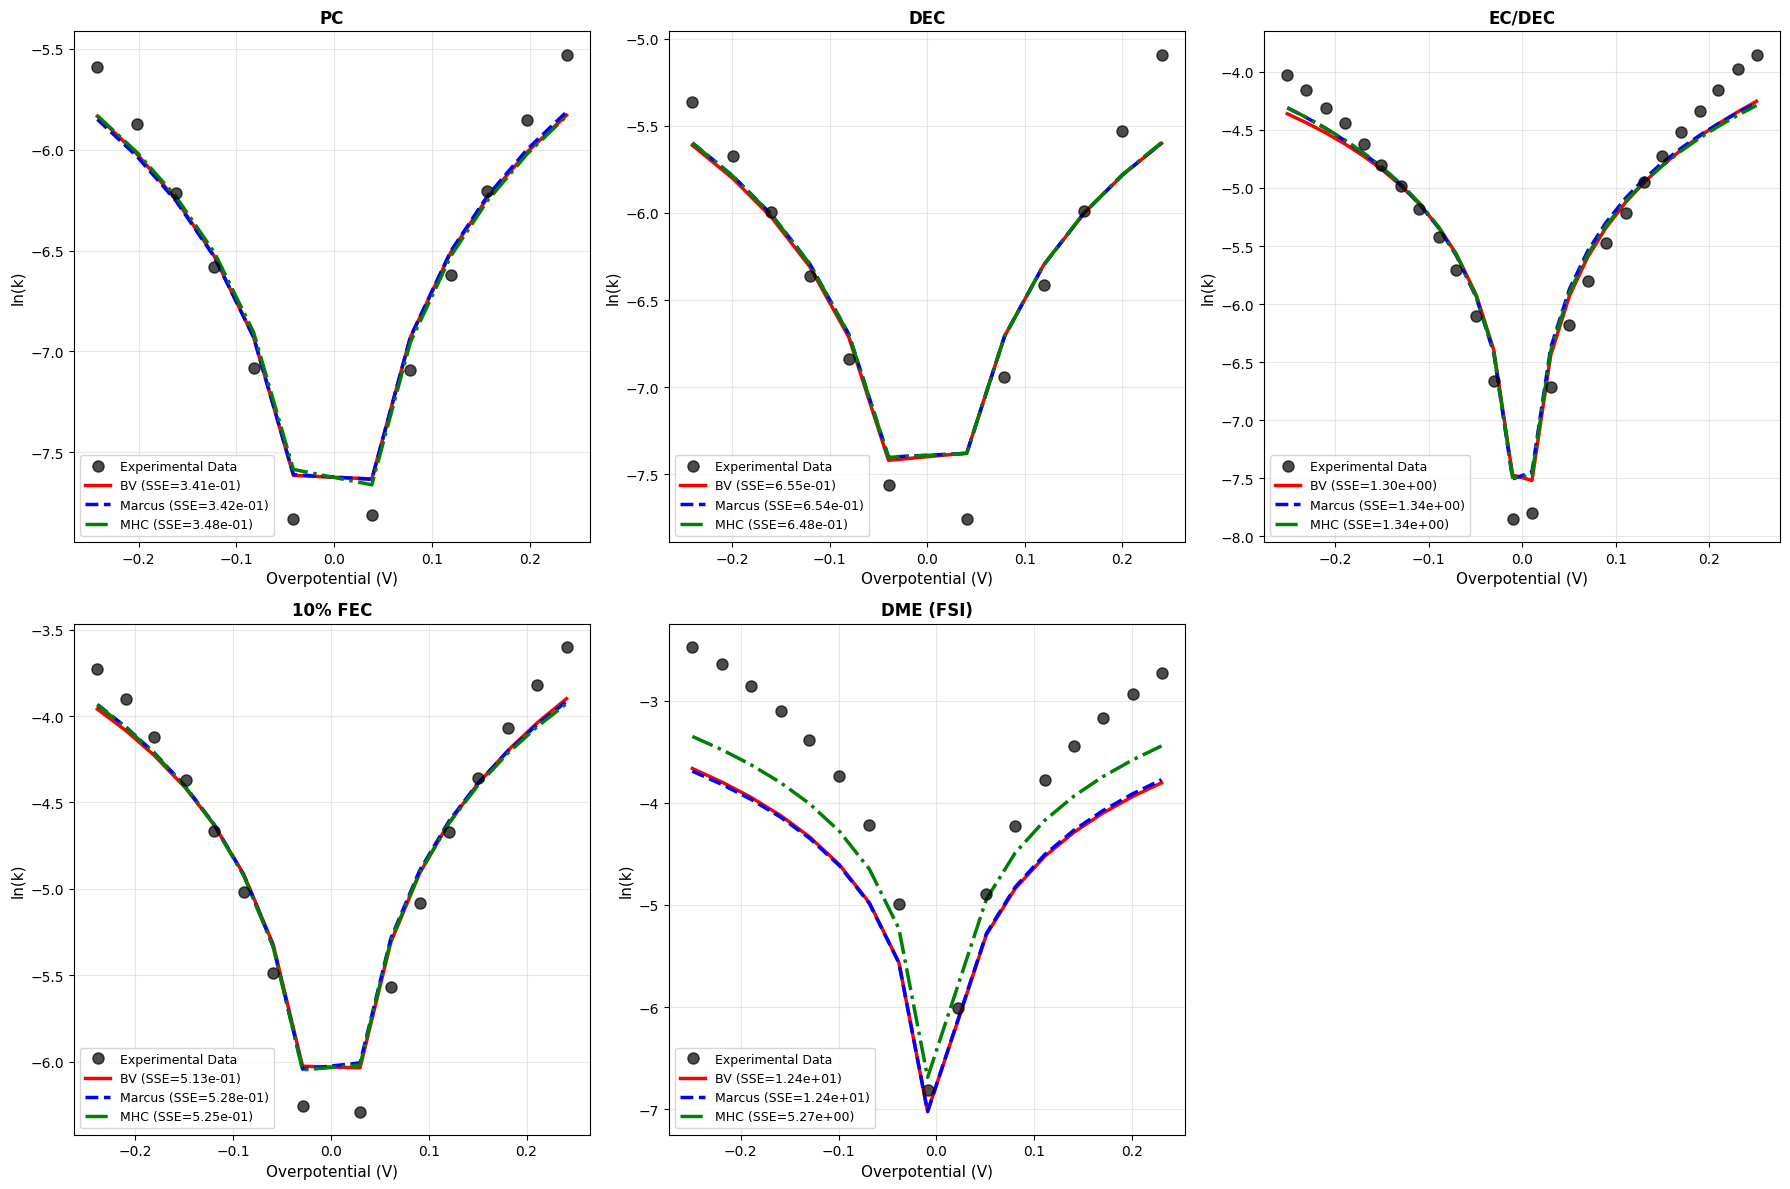

Model comparison plots generated and saved to 'electrolyte_model_fits.png'!


In [41]:
# Visualize model fits for all electrolytes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, electrolyte in enumerate(electrolyte_data.keys()):
    if i >= len(axes):
        break
        
    ax = axes[i]
    
    # Get experimental data
    csv_data = electrolyte_data[electrolyte]
    tafel_data = prepare_data_for_fitting(csv_data)
    
    # Plot experimental data
    ax.plot(tafel_data.eta, tafel_data.lnk, 'o', color='black', markersize=8, 
            label='Experimental Data', alpha=0.7, zorder=10)
    
    # Plot fitted models
    model_colors = {'BV': 'red', 'Marcus': 'blue', 'MHC': 'green'}
    model_styles = {'BV': '-', 'Marcus': '--', 'MHC': '-.'}
    
    for model_name in ['BV', 'Marcus', 'MHC']:
        result = fitting_results[electrolyte].get(model_name, {})
        config = fitting_config[model_name]
        
        if result.get('success', False):
            # Create model with fitted parameters based on model type
            if model_name == 'BV':
                fitted_model = Model(
                    model='BV', 
                    k01=result['k01'], 
                    k02=result['k02'], 
                    alpha=result['alpha'],
                    eta=tafel_data.eta,
                    origin_eta=True
                )
            elif model_name == 'Marcus':
                fitted_model = Model(
                    model='Marcus',
                    k01=result['k01'],
                    k02=result['k02'], 
                    lambda_=result['lambda'],
                    eta=tafel_data.eta,
                    origin_eta=True
                )
            elif model_name == 'MHC':
                # MHC uses MHC2 model with C parameter
                fitted_model = Model(
                    model='MHC2',
                    k01=result['k01'],
                    k02=result['k01'],  # Use k01 for both
                    lambda_=result['lambda'],
                    eta=tafel_data.eta,
                    C=result['C'],
                    origin_eta=True
                )
            
            # Generate model predictions
            eta_model, lnk_model = fitted_model.ln_k()
            
            ax.plot(eta_model, lnk_model, 
                   color=model_colors[model_name], 
                   linestyle=model_styles[model_name],
                   linewidth=2.5,
                   label=f'{model_name} (SSE={result["sse"]:.2e})')
    
    ax.set_xlabel('Overpotential (V)', fontsize=11)
    ax.set_ylabel('ln(k)', fontsize=11)
    ax.set_title(f'{electrolyte}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

# Remove extra subplots if any
for j in range(len(electrolyte_data), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('electrolyte_model_fits.png', dpi=150, bbox_inches='tight')
plt.show()

print("Model comparison plots generated and saved to 'electrolyte_model_fits.png'!")

Detailed Model Performance Analysis

PC:
--------------------------------------------------
  BV      : SSE = 3.4143e-01, R² = 0.9508
  Marcus  : SSE = 3.4188e-01, R² = 0.9508
  MHC     : SSE = 3.4768e-01, R² = 0.9499

DEC:
--------------------------------------------------
  BV      : SSE = 6.5532e-01, R² = 0.9177
  Marcus  : SSE = 6.5352e-01, R² = 0.9179
  MHC     : SSE = 6.4822e-01, R² = 0.9186

EC/DEC:
--------------------------------------------------
  BV      : SSE = 1.3023e+00, R² = 0.9580
  Marcus  : SSE = 1.3396e+00, R² = 0.9568
  MHC     : SSE = 1.3398e+00, R² = 0.9568

10% FEC:
--------------------------------------------------
  BV      : SSE = 5.1283e-01, R² = 0.9538
  Marcus  : SSE = 5.2795e-01, R² = 0.9524
  MHC     : SSE = 5.2546e-01, R² = 0.9526

DME (FSI):
--------------------------------------------------
  BV      : SSE = 1.2450e+01, R² = 0.4795
  Marcus  : SSE = 1.2449e+01, R² = 0.4795
  MHC     : SSE = 5.2689e+00, R² = 0.7797


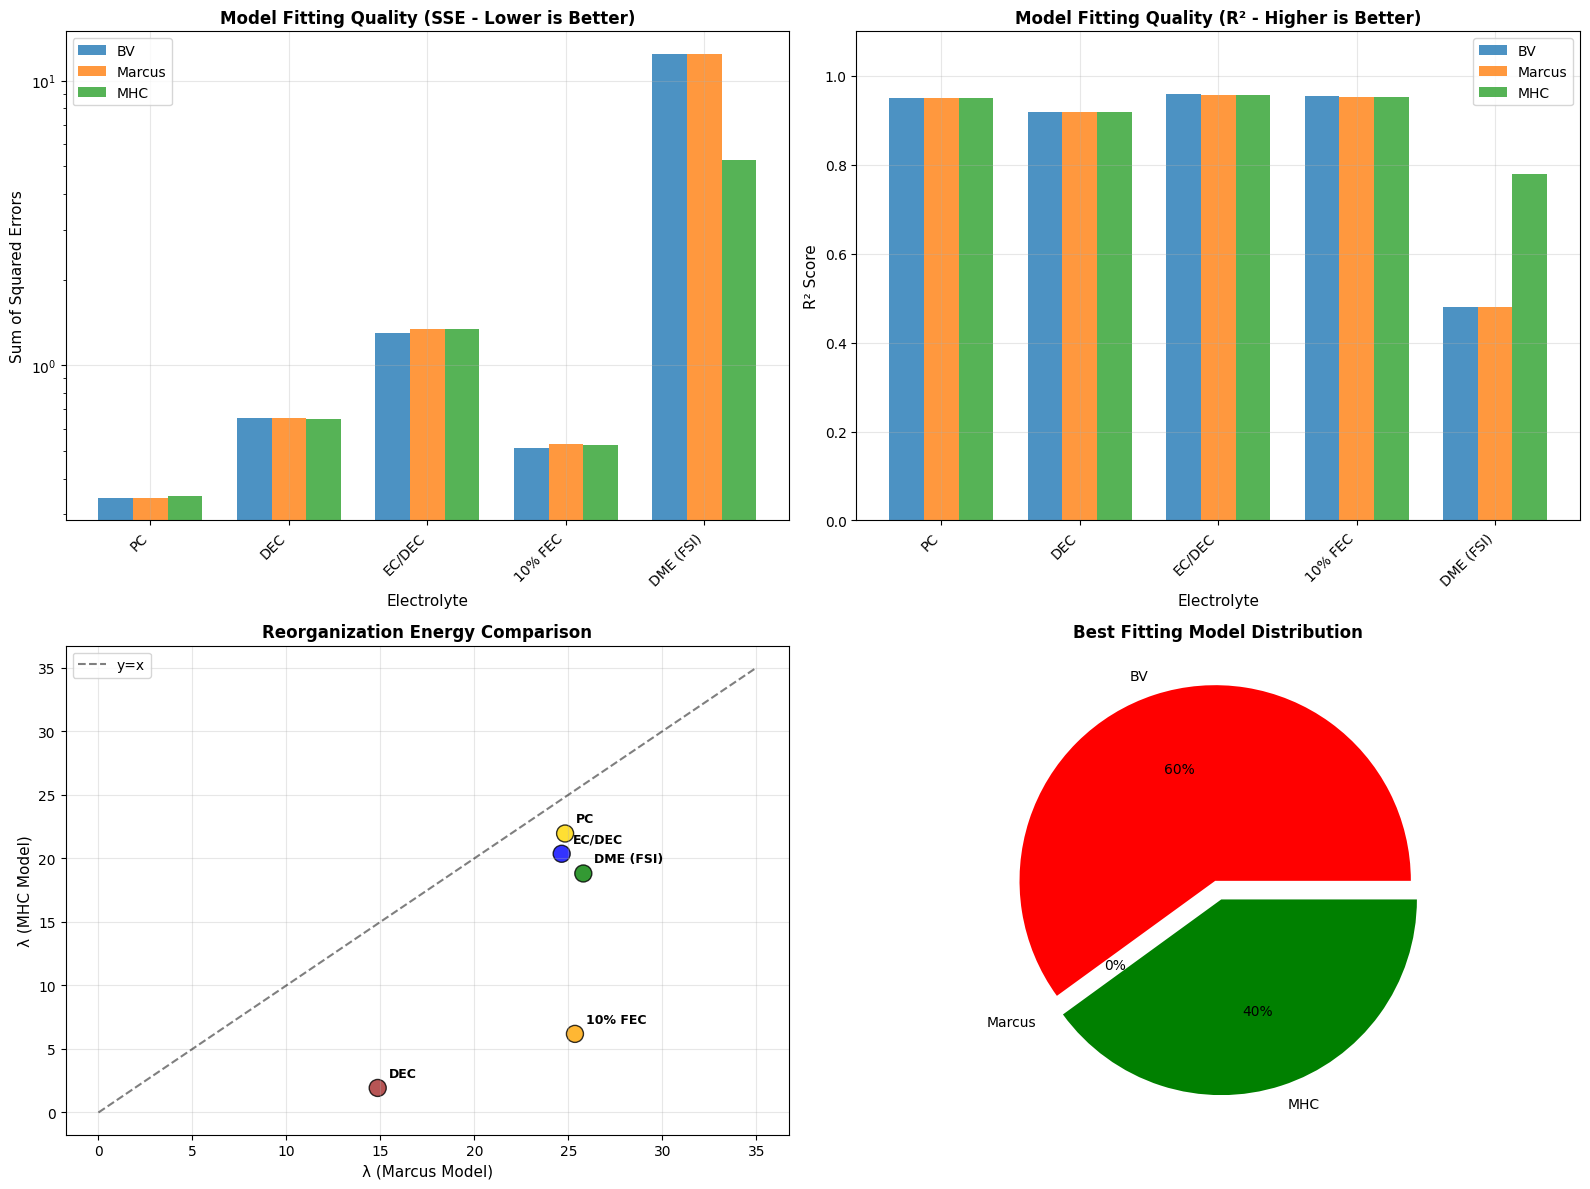


Model performance analysis completed!
Figures saved to 'electrolyte_model_analysis.png'


In [42]:
# Calculate R² values and detailed model comparison
print("Detailed Model Performance Analysis")
print("=" * 80)

# Calculate R² for each successful fit
r2_results = {}
for electrolyte in electrolyte_data.keys():
    r2_results[electrolyte] = {}
    
    # Get experimental data
    csv_data = electrolyte_data[electrolyte]
    tafel_data = prepare_data_for_fitting(csv_data)
    
    for model_name in ['BV', 'Marcus', 'MHC']:
        result = fitting_results[electrolyte].get(model_name, {})
        config = fitting_config[model_name]
        
        if result.get('success', False):
            # Generate model predictions
            if model_name == 'BV':
                model = Model(model='BV', k01=result['k01'], k02=result['k02'], 
                             alpha=result['alpha'], eta=tafel_data.eta, origin_eta=True)
            elif model_name == 'Marcus':
                model = Model(model='Marcus', k01=result['k01'], k02=result['k02'],
                             lambda_=result['lambda'], eta=tafel_data.eta, origin_eta=True)
            elif model_name == 'MHC':
                model = Model(model='MHC2', k01=result['k01'], k02=result['k01'],
                             lambda_=result['lambda'], eta=tafel_data.eta, C=result['C'], origin_eta=True)
            
            eta_model, lnk_model = model.ln_k()
            lnk_pred = np.interp(tafel_data.eta, eta_model, lnk_model)
            
            # Calculate R²
            r2 = r2_score(tafel_data.lnk, lnk_pred)
            r2_results[electrolyte][model_name] = r2
        else:
            r2_results[electrolyte][model_name] = np.nan

# Print detailed results
for electrolyte in electrolyte_data.keys():
    print(f"\n{electrolyte}:")
    print("-" * 50)
    
    for model_name in ['BV', 'Marcus', 'MHC']:
        result = fitting_results[electrolyte].get(model_name, {})
        r2 = r2_results[electrolyte].get(model_name, np.nan)
        
        if result.get('success', False):
            print(f"  {model_name:<8}: SSE = {result['sse']:.4e}, R² = {r2:.4f}")
        else:
            print(f"  {model_name:<8}: Fit failed")

# Create comparison bar chart
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# SSE comparison
electrolytes = list(electrolyte_data.keys())
models = ['BV', 'Marcus', 'MHC']
x_pos = np.arange(len(electrolytes))
width = 0.25

for i, model in enumerate(models):
    sse_values = []
    for electrolyte in electrolytes:
        result = fitting_results[electrolyte].get(model, {})
        sse_values.append(result.get('sse', np.nan) if result.get('success', False) else np.nan)
    
    ax1.bar(x_pos + i*width, sse_values, width, label=model, alpha=0.8)

ax1.set_xlabel('Electrolyte', fontsize=11)
ax1.set_ylabel('Sum of Squared Errors', fontsize=11)
ax1.set_title('Model Fitting Quality (SSE - Lower is Better)', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos + width)
ax1.set_xticklabels(electrolytes, rotation=45, ha='right')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)

# R² comparison
for i, model in enumerate(models):
    r2_values = []
    for electrolyte in electrolytes:
        r2_values.append(r2_results[electrolyte].get(model, np.nan))
    
    ax2.bar(x_pos + i*width, r2_values, width, label=model, alpha=0.8)

ax2.set_xlabel('Electrolyte', fontsize=11)
ax2.set_ylabel('R² Score', fontsize=11)
ax2.set_title('Model Fitting Quality (R² - Higher is Better)', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos + width)
ax2.set_xticklabels(electrolytes, rotation=45, ha='right')
ax2.set_ylim(0, 1.1)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Parameter comparison: Lambda values (Marcus vs MHC)
lambda_marcus = []
lambda_mhc = []
electrolyte_names = []

for electrolyte in electrolytes:
    marcus_result = fitting_results[electrolyte].get('Marcus', {})
    mhc_result = fitting_results[electrolyte].get('MHC', {})
    
    if marcus_result.get('success', False) and mhc_result.get('success', False):
        lambda_marcus.append(marcus_result['lambda'])
        lambda_mhc.append(mhc_result['lambda'])
        electrolyte_names.append(electrolyte)

if lambda_marcus and lambda_mhc:
    scatter_colors = [colors.get(name, 'gray') for name in electrolyte_names]
    ax3.scatter(lambda_marcus, lambda_mhc, s=150, c=scatter_colors, alpha=0.8, edgecolors='black')
    for i, name in enumerate(electrolyte_names):
        ax3.annotate(name, (lambda_marcus[i], lambda_mhc[i]), xytext=(8, 8), 
                    textcoords='offset points', fontsize=9, fontweight='bold')
    
    ax3.plot([0, 35], [0, 35], 'k--', alpha=0.5, label='y=x')
    ax3.set_xlabel('λ (Marcus Model)', fontsize=11)
    ax3.set_ylabel('λ (MHC Model)', fontsize=11)
    ax3.set_title('Reorganization Energy Comparison', fontsize=12, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

# Model preference pie chart
model_preferences = {'BV': 0, 'Marcus': 0, 'MHC': 0}
for electrolyte in electrolytes:
    min_sse = np.inf
    best_model = None
    
    for model in models:
        result = fitting_results[electrolyte].get(model, {})
        if result.get('success', False) and result['sse'] < min_sse:
            min_sse = result['sse']
            best_model = model
    
    if best_model:
        model_preferences[best_model] += 1

ax4.pie(model_preferences.values(), labels=model_preferences.keys(), autopct='%1.0f%%',
        colors=['red', 'blue', 'green'], explode=[0.05]*3)
ax4.set_title('Best Fitting Model Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('electrolyte_model_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nModel performance analysis completed!")
print("Figures saved to 'electrolyte_model_analysis.png'")

Diagnostic Analysis: Understanding the Data-Model Mismatch

PC:
  Potential range: -0.242 to 0.238 V
  ln(k) range: -7.83 to -5.53
  Data points: 12
  Negative eta points: 6, Positive eta points: 6

DEC:
  Potential range: -0.241 to 0.240 V
  ln(k) range: -7.76 to -5.09
  Data points: 12
  Negative eta points: 6, Positive eta points: 6

EC/DEC:
  Potential range: -0.251 to 0.250 V
  ln(k) range: -7.85 to -3.85
  Data points: 26
  Negative eta points: 13, Positive eta points: 13

10% FEC:
  Potential range: -0.239 to 0.241 V
  ln(k) range: -6.29 to -3.60
  Data points: 16
  Negative eta points: 8, Positive eta points: 8

DME (FSI):
  Potential range: -0.249 to 0.230 V
  ln(k) range: -6.81 to -2.48
  Data points: 17
  Negative eta points: 9, Positive eta points: 8


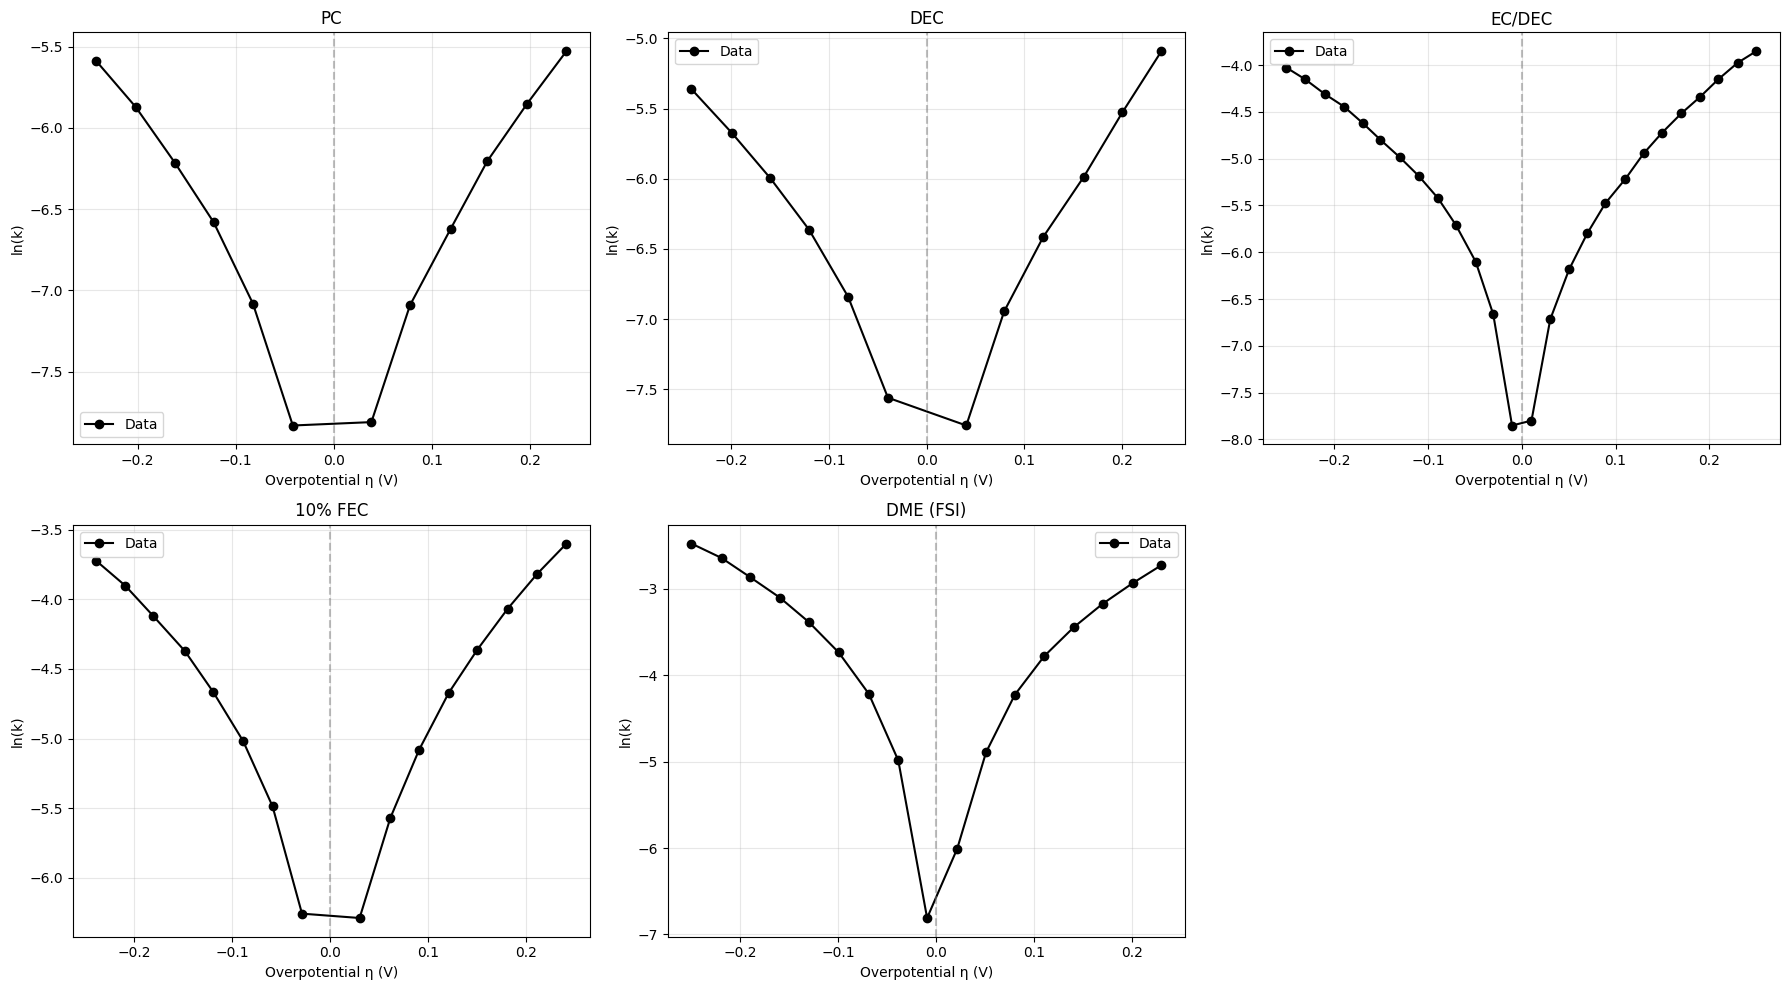

In [47]:
# Diagnostic: Let's examine the raw data vs model predictions to understand the mismatch
print("Diagnostic Analysis: Understanding the Data-Model Mismatch")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, electrolyte in enumerate(electrolyte_data.keys()):
    if i >= len(axes):
        break
    ax = axes[i]
    
    # Get transformed data
    csv_data = electrolyte_data[electrolyte]
    tafel_data = prepare_data_for_fitting(csv_data)
    
    # Show data range
    print(f"\n{electrolyte}:")
    print(f"  Potential range: {tafel_data.eta.min():.3f} to {tafel_data.eta.max():.3f} V")
    print(f"  ln(k) range: {tafel_data.lnk.min():.2f} to {tafel_data.lnk.max():.2f}")
    print(f"  Data points: {len(tafel_data.eta)}")
    
    # Plot the data
    ax.plot(tafel_data.eta, tafel_data.lnk, 'ko-', markersize=6, label='Data')
    
    # Check data symmetry around eta=0
    eta_neg = tafel_data.eta[tafel_data.eta < 0]
    eta_pos = tafel_data.eta[tafel_data.eta > 0]
    print(f"  Negative eta points: {len(eta_neg)}, Positive eta points: {len(eta_pos)}")
    
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    ax.set_xlabel('Overpotential η (V)')
    ax.set_ylabel('ln(k)')
    ax.set_title(f'{electrolyte}')
    ax.grid(True, alpha=0.3)
    ax.legend()

# Remove extra subplot
for j in range(len(electrolyte_data), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# The issue might be that the data doesn't follow standard Tafel behavior
# Let's check if the data is actually symmetric around eta=0 as expected

In [ ]:
# Try a more direct optimization using scipy.optimize.minimize with multiple methods
from scipy.optimize import minimize, differential_evolution, basinhopping

print("Using scipy's differential_evolution for global optimization")
print("=" * 80)

def model_prediction(params, eta, model_type):
    """Generate model predictions for given parameters and overpotential"""
    try:
        if model_type == 'BV':
            alpha, k01, k02 = params
            model = Model(model='BV', k01=k01, k02=k02, alpha=alpha, 
                         eta=eta, origin_eta=True)
        elif model_type == 'Marcus':
            lambda_, k01, k02 = params
            model = Model(model='Marcus', k01=k01, k02=k02, lambda_=lambda_, 
                         eta=eta, origin_eta=True)
        elif model_type == 'MHC':
            lambda_, k01, C = params
            model = Model(model='MHC2', k01=k01, k02=k01, lambda_=lambda_, 
                         eta=eta, C=C, origin_eta=True)
        
        eta_model, lnk_model = model.ln_k()
        lnk_pred = np.interp(eta, eta_model, lnk_model)
        return lnk_pred
    except:
        return np.ones_like(eta) * 1e6

def objective_scipy(params, eta, lnk, model_type):
    """Objective function for scipy optimization"""
    lnk_pred = model_prediction(params, eta, model_type)
    residuals = lnk - lnk_pred
    return np.sum(residuals**2)

# Improved fitting with differential evolution (more robust global optimizer)
fitting_results_improved = {}

for electrolyte_name in electrolyte_data.keys():
    print(f"\n{'='*60}")
    print(f"Fitting {electrolyte_name} with differential evolution...")
    print(f"{'='*60}")
    
    csv_data = electrolyte_data[electrolyte_name]
    tafel_data = prepare_data_for_fitting(csv_data)
    
    fitting_results_improved[electrolyte_name] = {}
    
    for model_name, config in fitting_config.items():
        print(f"  {model_name}...", end=" ")
        
        try:
            # Use differential evolution - a very robust global optimizer
            result = differential_evolution(
                objective_scipy,
                bounds=config['bounds'],
                args=(tafel_data.eta, tafel_data.lnk, config['model_type']),
                maxiter=2000,
                workers=-1,  # Use all CPU cores
                polish=True,  # Local polish at the end
                seed=42,
                tol=1e-10,
                atol=1e-10
            )
            
            final_params = result.x
            final_cost = result.fun
            
            # Store results
            result_dict = {
                'success': True,
                'sse': final_cost,
            }
            
            for i, param_name in enumerate(config['param_names']):
                result_dict[param_name] = final_params[i]
            
            fitting_results_improved[electrolyte_name][model_name] = result_dict
            
            print(f"SSE = {final_cost:.4e}")
            
        except Exception as e:
            fitting_results_improved[electrolyte_name][model_name] = {'success': False, 'error': str(e)}
            print(f"Error: {e}")

print("\n" + "=" * 80)
print("Differential evolution fitting completed!")

Using scipy's differential_evolution for global optimization

Fitting PC with differential evolution...
  BV... 